In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv("Churn_Data.csv")

In [11]:
df.head()

,surname,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,...,france,germany,spain,female,male,mem__no__products,cred_bal_sal,bal_sal,tenure_age,age_tenure_product
0,2023,668,33.0,3,0.00,2,1,0,181449.97,0,...,1,0,0,0,1,0,0.000000,0.000000,0.090909,99.0
1,2024,627,33.0,1,0.00,2,1,1,49503.50,0,...,1,0,0,0,1,2,0.000000,0.000000,0.030303,33.0
2,1236,678,40.0,10,0.00,2,1,0,184866.69,0,...,1,0,0,0,1,0,0.000000,0.000000,0.250000,400.0
3,1362,581,34.0,2,148882.54,1,1,1,84560.88,0,...,1,0,0,0,1,1,1022.940581,1.760655,0.058824,68.0
4,491,716,33.0,5,0.00,2,1,1,15068.83,0,...,0,0,1,0,1,2,0.000000,0.000000,0.151515,165.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   surname             175028 non-null  int64  
 1   creditscore         175028 non-null  int64  
 2   age                 175028 non-null  float64
 3   tenure              175028 non-null  int64  
 4   balance             175028 non-null  float64
 5   numofproducts       175028 non-null  int64  
 6   hascrcard           175028 non-null  int64  
 7   isactivemember      175028 non-null  int64  
 8   estimatedsalary     175028 non-null  float64
 9   exited              175028 non-null  int64  
 10  surname_tfidf_0     175028 non-null  float64
 11  surname_tfidf_1     175028 non-null  float64
 12  surname_tfidf_2     175028 non-null  float64
 13  surname_tfidf_3     175028 non-null  float64
 14  surname_tfidf_4     175028 non-null  float64
 15  france              175028 non-nul

In [13]:
df.describe()

,surname,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,...,france,germany,spain,female,male,mem__no__products,cred_bal_sal,bal_sal,tenure_age,age_tenure_product
count,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,...,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,1.750280e+05,175028.000000,175028.000000,175028.000000
mean,1617.462812,656.113068,38.171337,5.019968,56676.772103,1.553072,0.751183,0.498754,111863.295024,0.211149,...,0.566909,0.212046,0.221045,0.436644,0.563356,0.784989,1.444363e+03,2.202494,0.138587,191.346929
std,813.852174,81.148273,8.969565,2.811155,62982.418525,0.549212,0.432329,0.500000,50815.118428,0.408125,...,0.495504,0.408758,0.414952,0.495971,0.495971,0.871599,6.097238e+04,92.679435,0.085465,118.745788
min,0.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,949.000000,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,73225.310000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.068182,93.000000
50%,1666.000000,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,116969.730000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.131579,180.000000
75%,2292.000000,710.000000,42.000000,7.000000,120727.970000,2.000000,1.000000,1.000000,154767.340000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,6.585861e+02,1.000001,0.200000,272.000000
max,2931.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,8.634204e+06,12863.796200,0.555556,880.000000


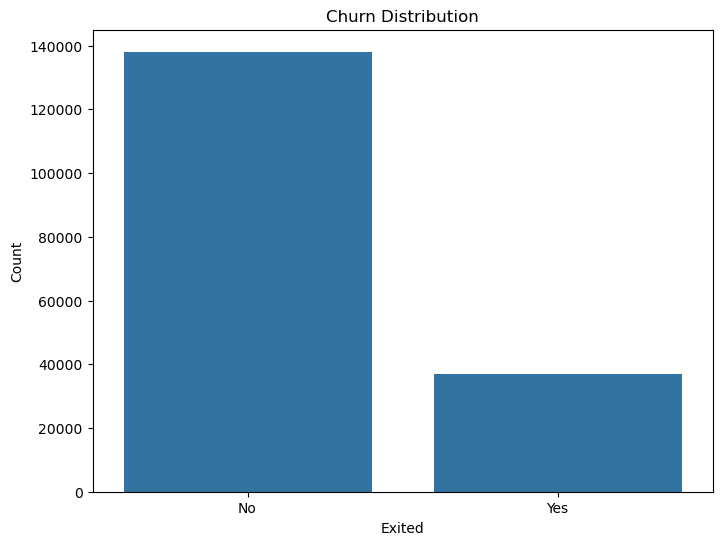

In [14]:
# Churn Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='exited', data=df)
plt.title('Churn Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.savefig('churn_distribution')

In [15]:
# Correlation Analysis
selected_columns = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'exited']
corr_matrix = df[selected_columns].corr()


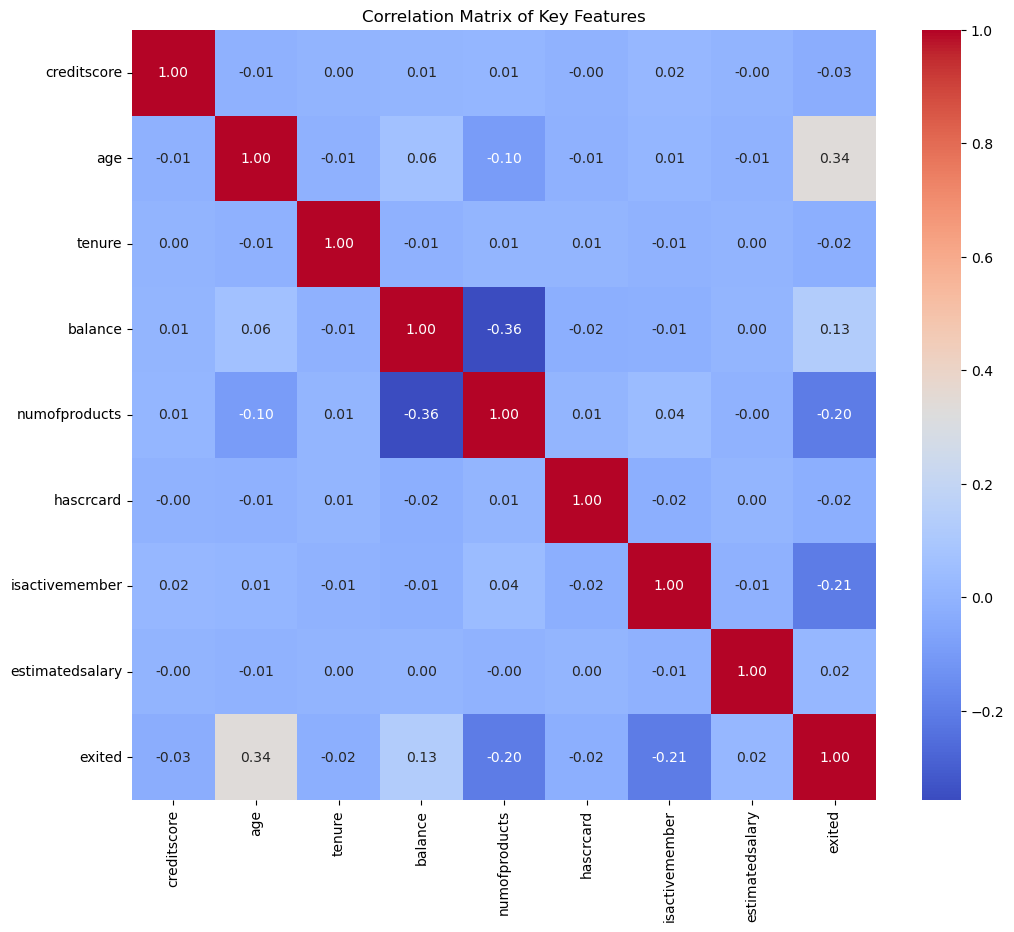

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Features')
plt.savefig('correlation_matrix')

In [17]:
# Analyzing categorical features in relation to churn
df['geography'] = df[['france', 'germany', 'spain']].idxmax(axis=1)


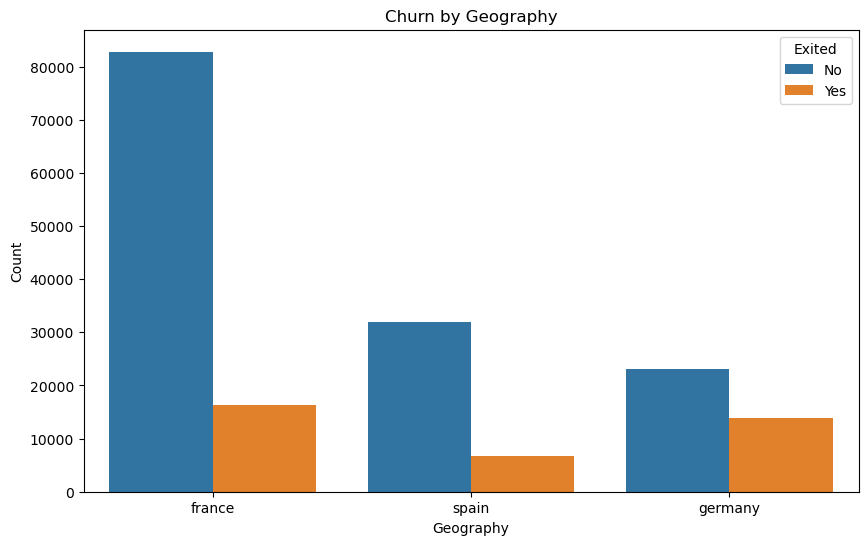

In [21]:
# Geography vs. Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='geography', hue='exited', data=df)
plt.title('Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['No', 'Yes'])

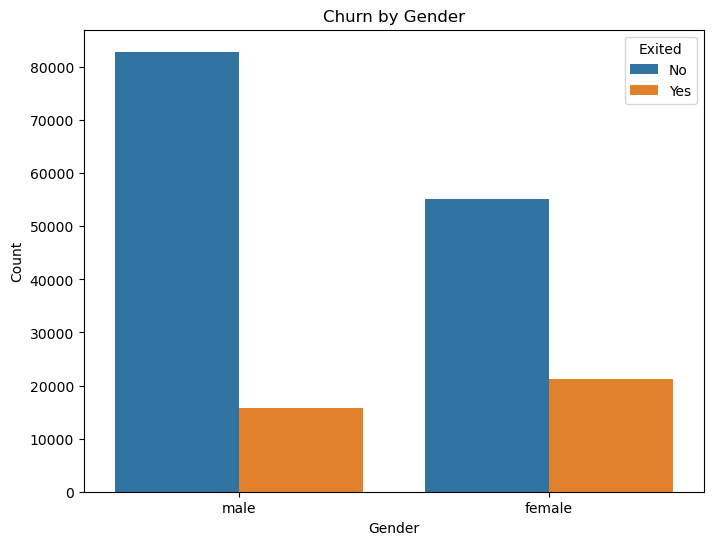

In [20]:
# Gender vs. Churn
df['gender'] = df[['female', 'male']].idxmax(axis=1)
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='exited', data=df)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['No', 'Yes'])

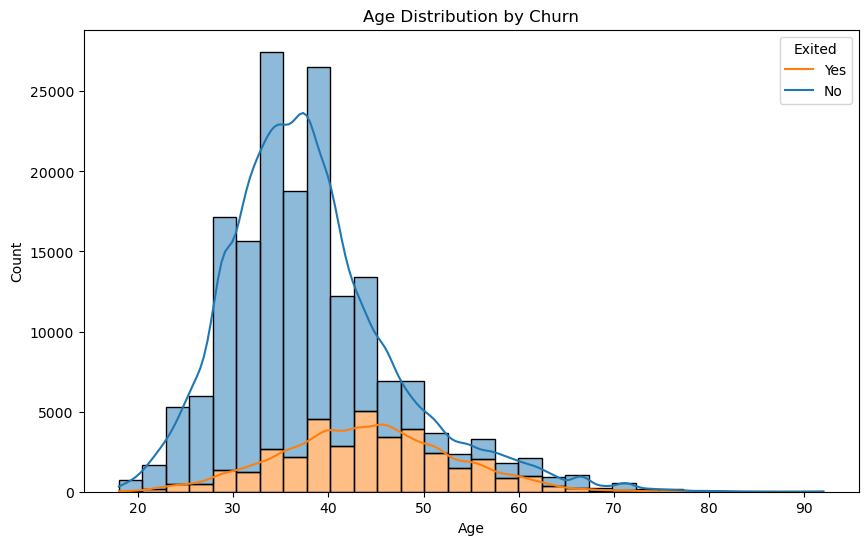

In [23]:
# Age vs. Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='exited', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution by Churn')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Yes', 'No'])

([<matplotlib.axis.XTick at 0x176c537d0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

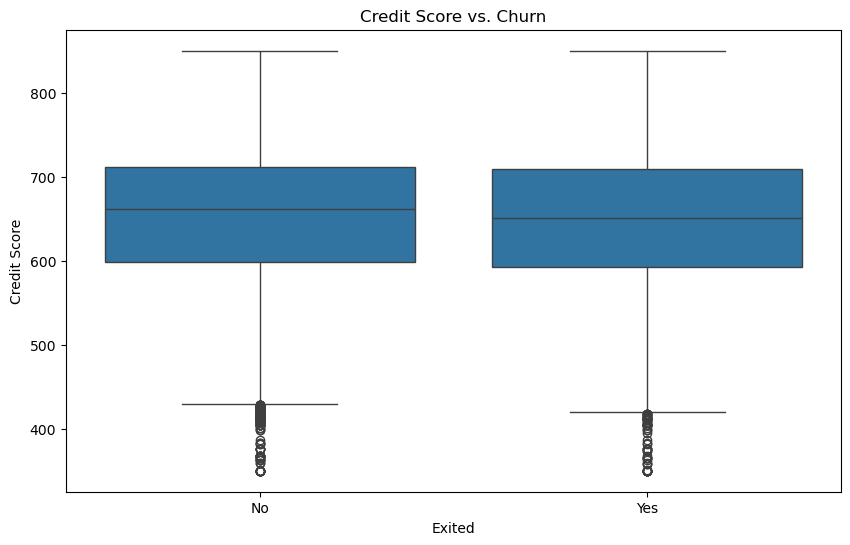

In [24]:
# Credit Score vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='exited', y='creditscore', data=df)
plt.title('Credit Score vs. Churn')
plt.xlabel('Exited')
plt.ylabel('Credit Score')
plt.xticks([0, 1], ['No', 'Yes'])

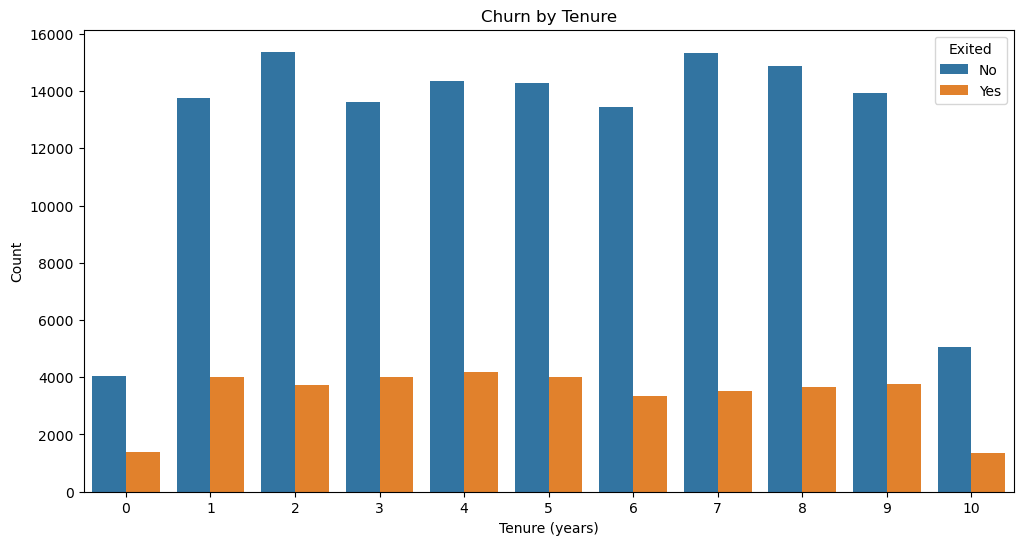

In [25]:
# Tenure vs. Churn
plt.figure(figsize=(12, 6))
sns.countplot(x='tenure', hue='exited', data=df)
plt.title('Churn by Tenure')
plt.xlabel('Tenure (years)')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['No', 'Yes'])

([<matplotlib.axis.XTick at 0x177b61450>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

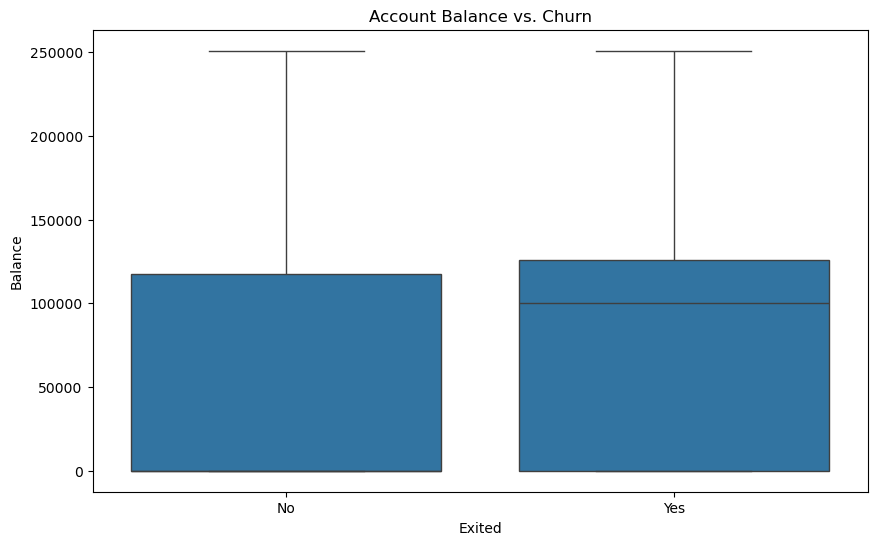

In [26]:
# Balance vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='exited', y='balance', data=df)
plt.title('Account Balance vs. Churn')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.xticks([0, 1], ['No', 'Yes'])

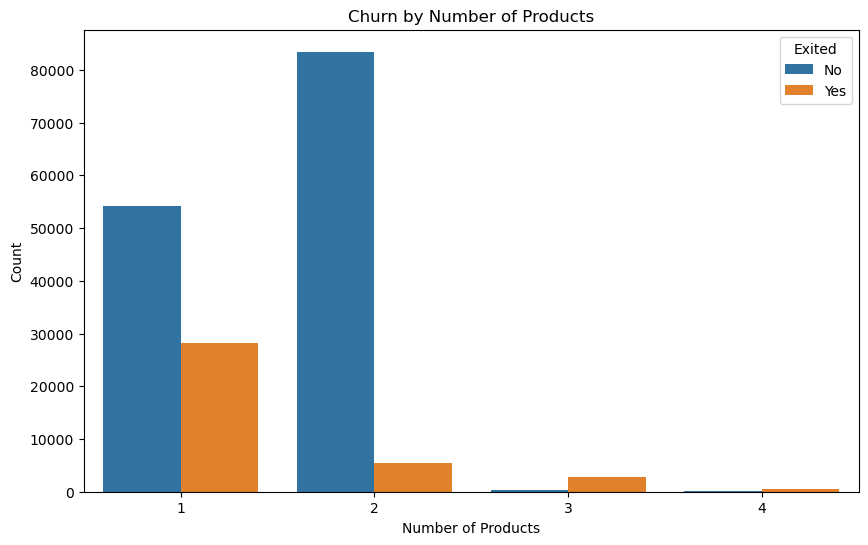

In [27]:
# Number of Products vs. Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='numofproducts', hue='exited', data=df)
plt.title('Churn by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['No', 'Yes'])

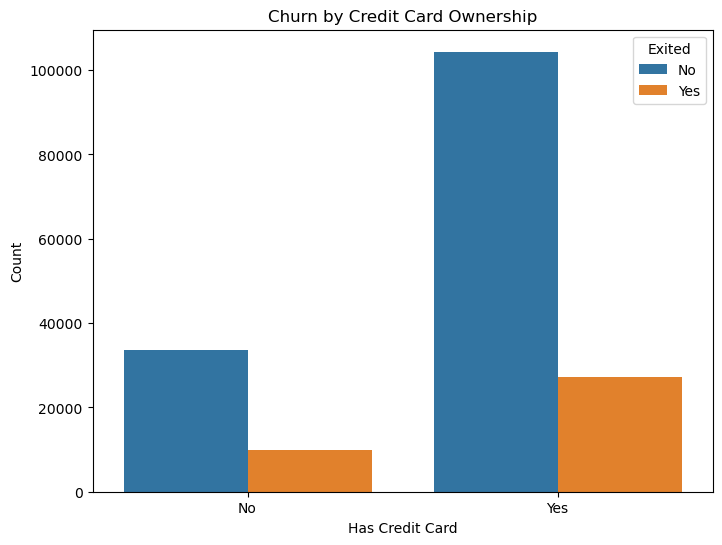

In [28]:
# Has Credit Card vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='hascrcard', hue='exited', data=df)
plt.title('Churn by Credit Card Ownership')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Exited', labels=['No', 'Yes'])

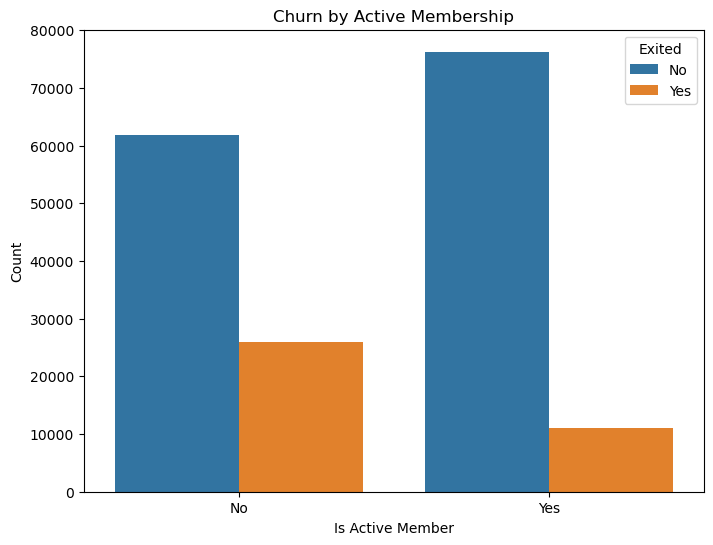

In [29]:
# Is Active Member vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='isactivemember', hue='exited', data=df)
plt.title('Churn by Active Membership')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Exited', labels=['No', 'Yes'])

([<matplotlib.axis.XTick at 0x3021322d0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

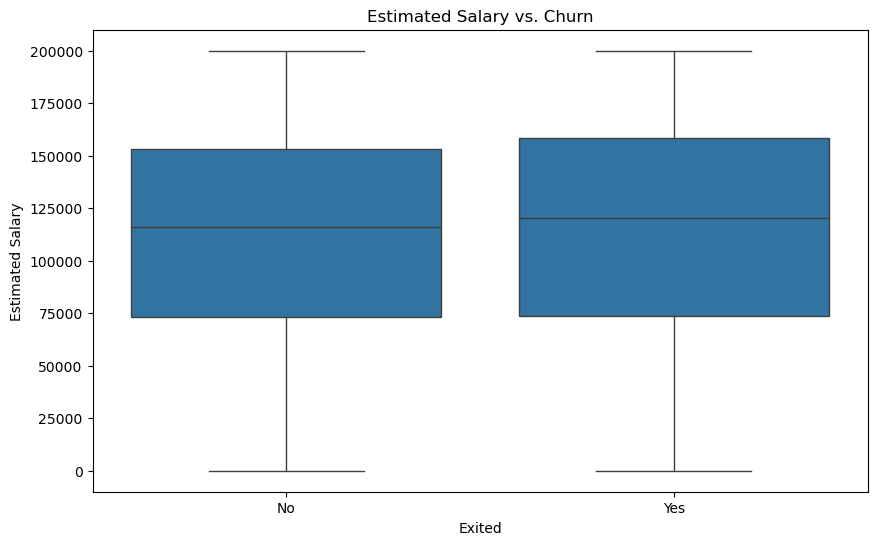

In [30]:
# Estimated Salary vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='exited', y='estimatedsalary', data=df)
plt.title('Estimated Salary vs. Churn')
plt.xlabel('Exited')
plt.ylabel('Estimated Salary')
plt.xticks([0, 1], ['No', 'Yes'])

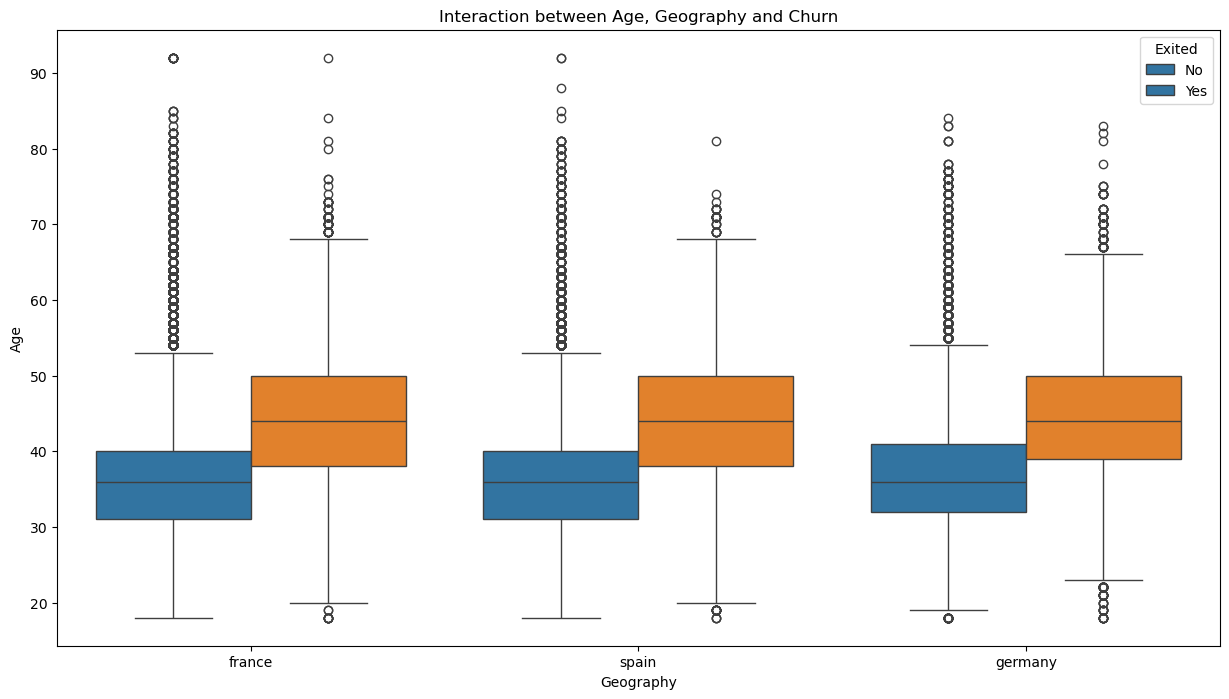

In [31]:
# Interaction between Age, Geography and Churn
plt.figure(figsize=(15, 8))
sns.boxplot(x='geography', y='age', hue='exited', data=df)
plt.title('Interaction between Age, Geography and Churn')
plt.xlabel('Geography')
plt.ylabel('Age')
plt.legend(title='Exited', labels=['No', 'Yes'])

<Figure size 1500x800 with 0 Axes>

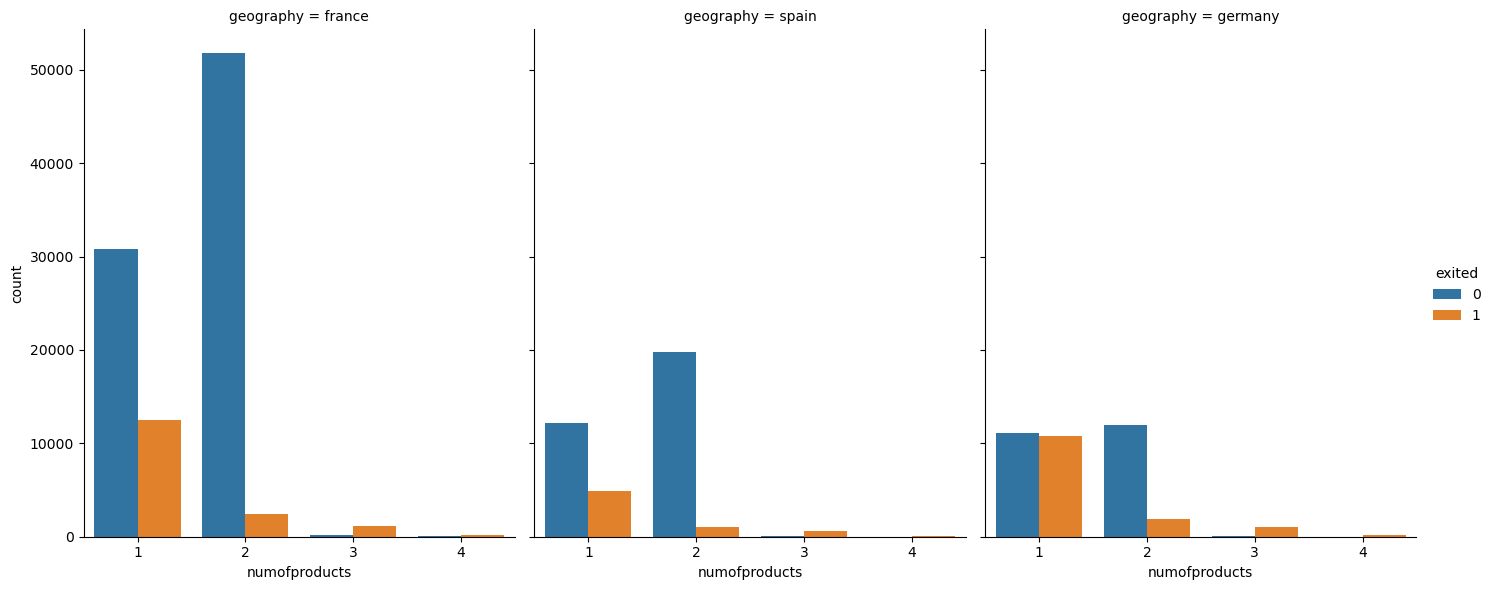

In [32]:
# Interaction between Number of Products, Geography and Churn
plt.figure(figsize=(15, 8))
sns.catplot(x='numofproducts', hue='exited', col='geography', data=df, kind='count', height=6, aspect=0.8)
plt.savefig('interaction_numofproducts_geography_churn.png')


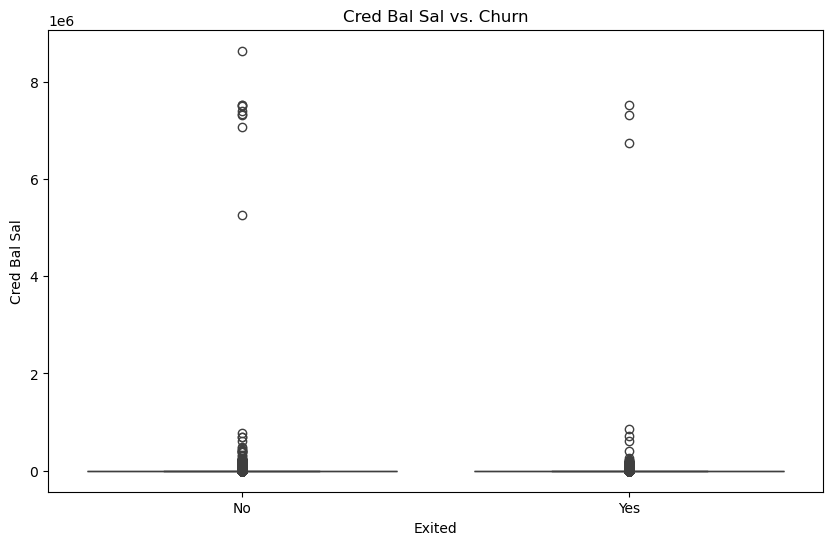

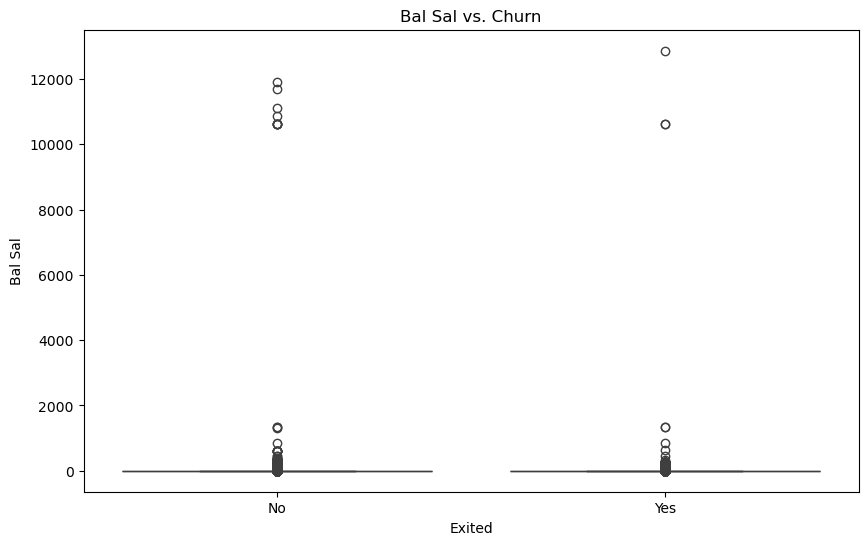

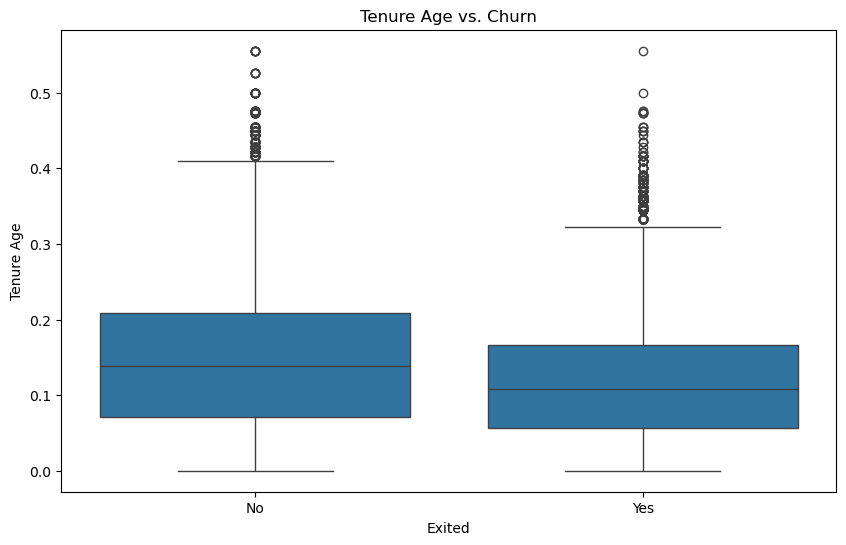

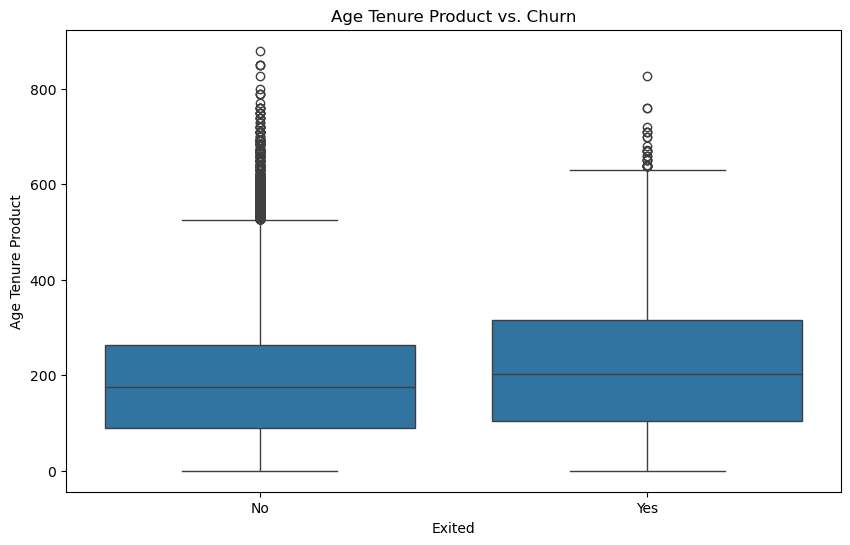

In [33]:
# Analysis of Engineered Features vs. Churn
engineered_features = ['cred_bal_sal', 'bal_sal', 'tenure_age', 'age_tenure_product']
for feature in engineered_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='exited', y=feature, data=df)
    plt.title(f'{feature.replace("_", " ").title()} vs. Churn')
    plt.xlabel('Exited')
    plt.ylabel(feature.replace("_", " ").title())
    plt.xticks([0, 1], ['No', 'Yes'])

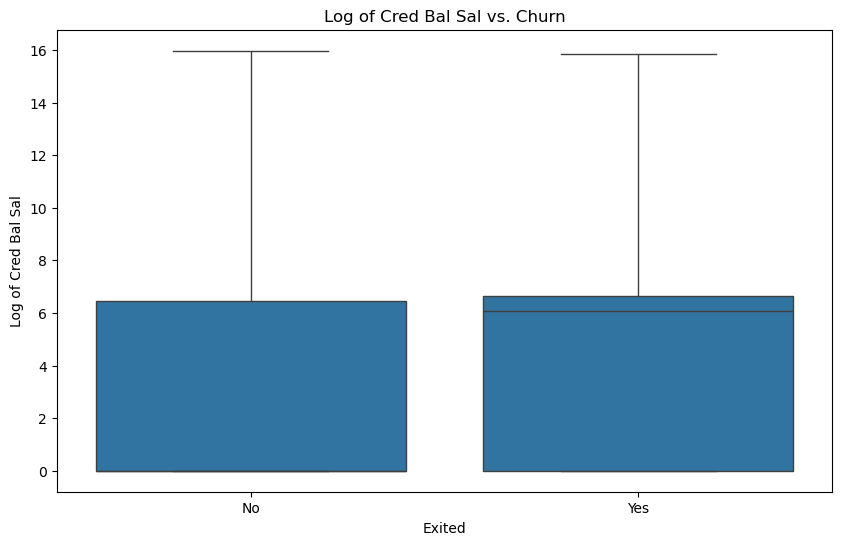

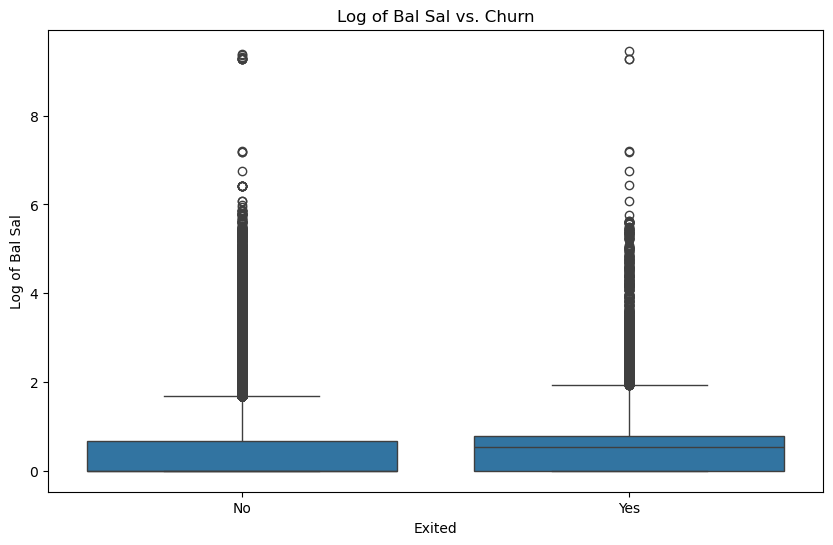

In [46]:
df['log_cred_bal_sal'] = df['cred_bal_sal'].apply(lambda x: np.log(x + 1))
df['log_bal_sal'] = df['bal_sal'].apply(lambda x: np.log(x + 1))

# Plot 1: Log Cred Bal Sal vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='exited', y='log_cred_bal_sal', data=df)
plt.title('Log of Cred Bal Sal vs. Churn')
plt.xlabel('Exited')
plt.ylabel('Log of Cred Bal Sal')
plt.xticks([0, 1], ['No', 'Yes'])
plt.savefig('churn_by_log_cred_bal_sal.png')
plt.show()

# Plot 2: Log Bal Sal vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='exited', y='log_bal_sal', data=df)
plt.title('Log of Bal Sal vs. Churn')
plt.xlabel('Exited')
plt.ylabel('Log of Bal Sal')
plt.xticks([0, 1], ['No', 'Yes'])
plt.savefig('churn_by_log_bal_sal.png')
plt.show()


In [37]:
# 2. Identify Columns for Outlier Handling
numerical_cols = [
    'creditscore',
    'age',
    'balance',
    'estimatedsalary',
    'cred_bal_sal',
    'bal_sal',
    'tenure_age',
    'age_tenure_product'
]

In [38]:
# Create a copy of the dataframe to store the cleaned data
df_capped = df.copy()

print("--- Descriptive Statistics (Before Outlier Handling) ---")
print(df[numerical_cols].describe())

print("\nIdentifying and handling outliers...\n")
outliers_count = {}

--- Descriptive Statistics (Before Outlier Handling) ---
         creditscore            age        balance  estimatedsalary  \
count  175028.000000  175028.000000  175028.000000    175028.000000   
mean      656.113068      38.171337   56676.772103    111863.295024   
std        81.148273       8.969565   62982.418525     50815.118428   
min       350.000000      18.000000       0.000000        11.580000   
25%       597.000000      32.000000       0.000000     73225.310000   
50%       659.000000      37.000000       0.000000    116969.730000   
75%       710.000000      42.000000  120727.970000    154767.340000   
max       850.000000      92.000000  250898.090000    199992.480000   

       cred_bal_sal        bal_sal     tenure_age  age_tenure_product  
count  1.750280e+05  175028.000000  175028.000000       175028.000000  
mean   1.444363e+03       2.202494       0.138587          191.346929  
std    6.097238e+04      92.679435       0.085465          118.745788  
min    0.000000

In [39]:
# --- 3. IQR-Based Outlier Capping ---
# Loop through each specified column
for col in numerical_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier detection boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and count outliers
    outliers = df_capped[(df_capped[col] < lower_bound) | (df_capped[col] > upper_bound)]
    outliers_count[col] = len(outliers)

In [41]:
# Apply capping and flooring to handle outliers
df_capped[col] = np.where(
    df_capped[col] > upper_bound,
    upper_bound, # Cap values above the upper bound
    np.where(
        df_capped[col] < lower_bound,
        lower_bound, # Floor values below the lower bound
        df_capped[col] # Keep original value if not an outlier
    )
)

In [42]:
# 4. Review the Results
print("Number of outliers handled in each column:")
for col, count in outliers_count.items():
    print(f"- {col}: {count}")


Number of outliers handled in each column:
- creditscore: 331
- age: 7049
- balance: 0
- estimatedsalary: 0
- cred_bal_sal: 10484
- bal_sal: 10353
- tenure_age: 623
- age_tenure_product: 940


In [43]:
# Display descriptive statistics after handling outliers
print("\n--- Descriptive Statistics (After Outlier Handling) ---")
print(df_capped[numerical_cols].describe())


--- Descriptive Statistics (After Outlier Handling) ---
         creditscore            age        balance  estimatedsalary  \
count  175028.000000  175028.000000  175028.000000    175028.000000   
mean      656.113068      38.171337   56676.772103    111863.295024   
std        81.148273       8.969565   62982.418525     50815.118428   
min       350.000000      18.000000       0.000000        11.580000   
25%       597.000000      32.000000       0.000000     73225.310000   
50%       659.000000      37.000000       0.000000    116969.730000   
75%       710.000000      42.000000  120727.970000    154767.340000   
max       850.000000      92.000000  250898.090000    199992.480000   

       cred_bal_sal        bal_sal     tenure_age  age_tenure_product  
count  1.750280e+05  175028.000000  175028.000000       175028.000000  
mean   1.444363e+03       2.202494       0.138587          191.006206  
std    6.097238e+04      92.679435       0.085465          117.585155  
min    0.000000

In [44]:
# --- 5. Save the Cleaned Data ---
df_capped.to_csv('Churn_Data_Cleaned.csv', index=False)
print("\nCleaned data has been saved to 'Churn_Data_Cleaned.csv'")


Cleaned data has been saved to 'Churn_Data_Cleaned.csv'
